In [2]:
from PIL import Image, ImageDraw
from PIL import ImagePath 

import numpy as np

之前UAV-HIRAP绘制用到的代码
```python
image = Image.new('RGBA', (10000, 10000),color='white')
    draw = ImageDraw.Draw(image)
    for i in field_survey.index:
        if field_survey.loc[i, 'Kind'] == 'tree':
            color = (213, 94, 0) # trees => red color
        else:
            color = (0,114,178) # shrubs => blue color, including shrub-like trees
        position = (field_survey.loc[i, 'x0'], field_survey.loc[i, 'y0'], field_survey.loc[i, 'x1'], field_survey.loc[i, 'y1'])
        draw.ellipse(position, fill=color,outline=color)

    image.save('output/field_array.png')
```

In [35]:
x=[1,2,8,1]
y=[1,7,4,1]

xy = np.array([y,x])
xy = xy.T
xy

array([[1, 1],
       [7, 2],
       [4, 8],
       [1, 1]])

In [36]:
w = 10
h = 10

In [37]:
image = Image.new('1', (w, h), color=0)

In [38]:
imdraw = ImageDraw.Draw(image)

```python
import math
xy = [
    ((math.cos(th) + 1) * 90,
     (math.sin(th) + 1) * 60)
    for th in [i * (2 * math.pi) / 8 for i in range(8)]
    ]  
xy
>>> 
[(180.0, 60.0),
 (153.63961030678928, 102.42640687119285),
 (90.0, 120.0),
 (26.360389693210728, 102.42640687119285),
 (0.0, 60.000000000000014),
 (26.36038969321071, 17.573593128807154),
 (89.99999999999999, 0.0),
 (153.63961030678928, 17.57359312880714)]
```

In [12]:
for i in xy:
    print(tuple(i))

(1, 1)
(2, 7)
(8, 4)
(1, 1)


In [39]:
xy_pil = [tuple(i) for i in xy]

In [40]:
imdraw.polygon(xy_pil, fill=1, outline=1) 

In [41]:
display(image)

In [42]:
mask = np.array(image, dtype=int)
mask

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [19]:
from skimage.draw import polygon

In [20]:
img = np.zeros((10, 10), dtype=np.uint8)
rr, cc = polygon([1, 2, 8], [1, 7, 4])
img[rr, cc] = 1

In [22]:
import matplotlib.pyplot as plt

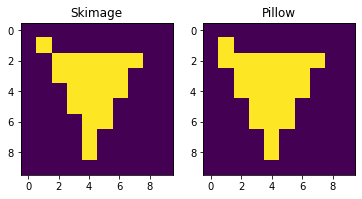

In [43]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(img)
ax[0].set_title("Skimage")

ax[1].imshow(mask)
ax[1].set_title("Pillow")

plt.show()

In [46]:
# float type
imagef = Image.new('1', (10, 10), color=0)
imdrawf = ImageDraw.Draw(imagef)
xy_pilf = [tuple(i + 0.5) for i in xy]
imdrawf.polygon(xy_pilf, fill=1, outline=1) 

maskf = np.array(image, dtype=int)
maskf

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

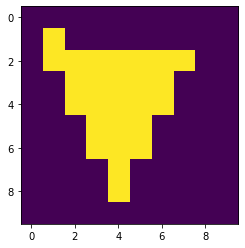

In [47]:
plt.imshow(maskf)

# 性能测试

In [45]:
imagel = Image.new('1', (w*1000, h*1000), color=0)
imdrawl = ImageDraw.Draw(imagel)

xy_pil_l = [tuple(i * 1000) for i in xy]
imdrawl.polygon(xy_pil_l, fill=1, outline=1) 

display(imagel)